## ЛАБОРАТОРНАЯ РАБОТА 3. РЕШЕНИЕ СИСТЕМ ЛИНЕЙНЫХ АЛГЕБРАИЧЕСКИХ УРАВНЕНИЙ ПРЯМЫМИ МЕТОДАМИ. ТЕОРИЯ ВОЗМУЩЕНИЙ
### Вариант №10
### Котосов А.Э., БПМ-171

In [1]:
import numpy as np

### 3.1 Дана система уравнений Ax=b порядка n. Исследовать зависимость погрешности решения x от погрешностей правой части системы b.

Зададим и решим систему.

In [42]:
N = 10 #номер варианта
n = 9 #порядок системы

#Создадим исходную систему уравнений по правилу из задания
A = np.array([[np.sin(0.1*N*i*j/8) for j in range (1, n + 1)] for i in range (1, n + 1)])

In [44]:
print (A)

[[ 0.12467473  0.24740396  0.36627253  0.47942554  0.58509727  0.68163876
   0.7675435   0.84147098  0.90226759]
 [ 0.24740396  0.47942554  0.68163876  0.84147098  0.94898462  0.99749499
   0.98398595  0.90929743  0.7780732 ]
 [ 0.36627253  0.68163876  0.90226759  0.99749499  0.95408578  0.7780732
   0.4939203   0.14112001 -0.23129381]
 [ 0.47942554  0.84147098  0.99749499  0.90929743  0.59847214  0.14112001
  -0.35078323 -0.7568025  -0.97753012]
 [ 0.58509727  0.94898462  0.95408578  0.59847214  0.01659189 -0.57156132
  -0.94362219 -0.95892427 -0.61168225]
 [ 0.68163876  0.99749499  0.7780732   0.14112001 -0.57156132 -0.97753012
  -0.85893449 -0.2794155   0.45004407]
 [ 0.7675435   0.98398595  0.4939203  -0.35078323 -0.94362219 -0.85893449
  -0.15752643  0.6569866   0.99977912]
 [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
   0.6569866   0.98935825  0.41211849]
 [ 0.90226759  0.7780732  -0.23129381 -0.97753012 -0.61168225  0.45004407
   0.99977912  0.4121184

In [45]:
b = np.ones(n) * N

print(b)

[10. 10. 10. 10. 10. 10. 10. 10. 10.]


In [49]:
x = np.linalg.solve(A, b)
print ('Полученное решение системы:', x)

Полученное решение системы: [ 1.60810757e+08 -2.45838810e+08  2.33768436e+08 -1.61717156e+08
  8.40018805e+07 -3.23995419e+07  8.85921477e+06 -1.54649570e+06
  1.30621962e+05]


Вычислим число обусловленности матрицы
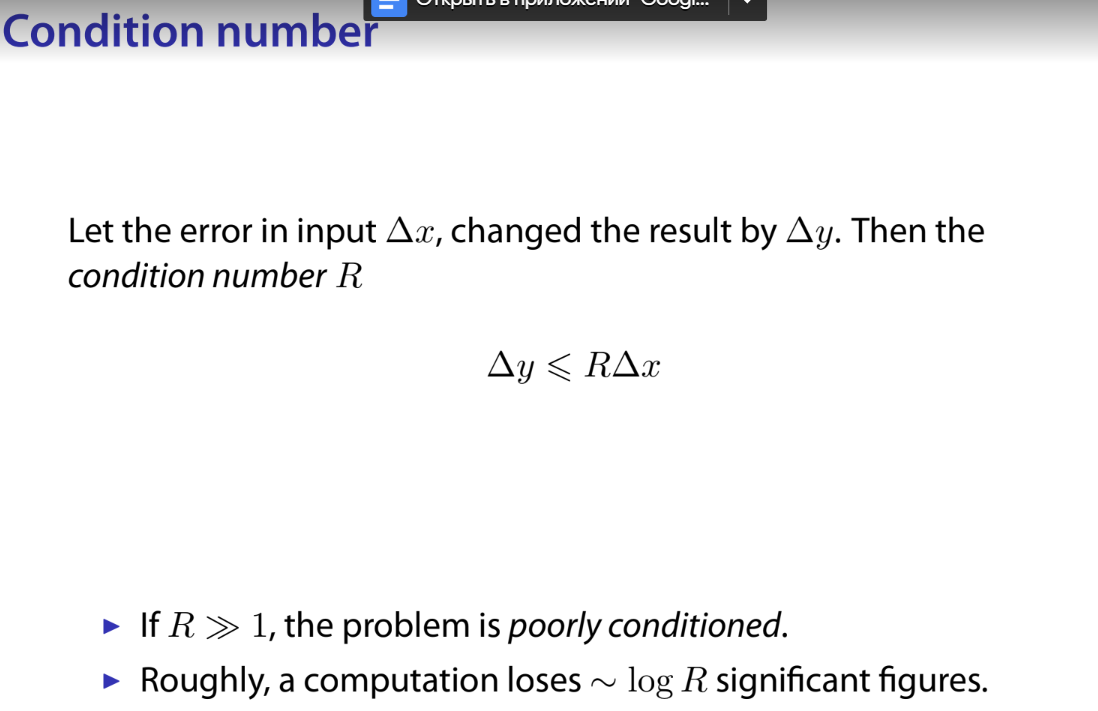

In [52]:
cond_num = np.linalg.cond(A, p = np.inf)
print("Число обусловленности :", cond_num)

Condition number : 3398096180.854602


Найдём относительные погрешности решения
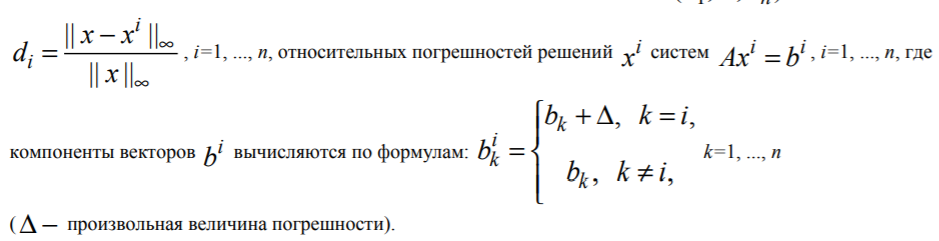

In [111]:
delta = 1e-4 # произвольная величина погрешности
b_flact = b + delta * np.eye(n,n)
d = np.zeros(n)

for i in range(n):
    x_i = np.linalg.solve(A,b_flact[i])
    d[i] = np.linalg.norm(x - x_i, np.inf) / np.linalg.norm(x, np.inf)

In [112]:
print("Вектор относительных погрешностей:\n",np.array(d))

Вектор относительных погрешностей:
 [3.48972726e-05 5.33214526e-05 5.06581987e-05 3.49984288e-05
 1.81464904e-05 6.98207459e-06 1.90297332e-06 3.30747734e-07
 2.77686508e-08]


In [113]:
prac = np.argmax(d, axis = 0)
print("Индекс компоненты, оказывающей наибольшее влияние (при индексации, начиная с единицы): ", prac+1)

Индекс компоненты, оказывающей наибольшее влияние (при индексации, начиная с единицы):  2


Найдём теоретическую погрешность

In [114]:
d_theor = cond_num*np.linalg.norm(b-b_flact[prac],ord=np.inf)/np.linalg.norm(b,ord=np.inf)
print(d_theor)

33980.961808466825


В результате получилось, что практическая оценка значительно меньше теоретической. Такой результат объясняется большим числом обусловленности. Так как теоретическая оценка больше практической, то решение можно считать корректным.

### 3.4 Решить систему уравнений Ax=b из задачи 3.1, используя LU-разложение матрицы A. 

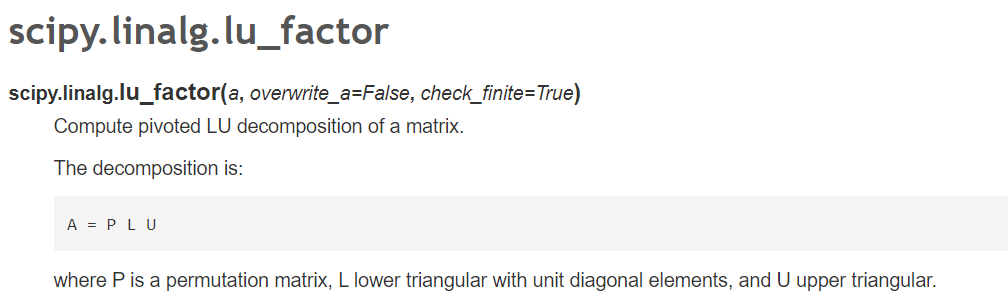

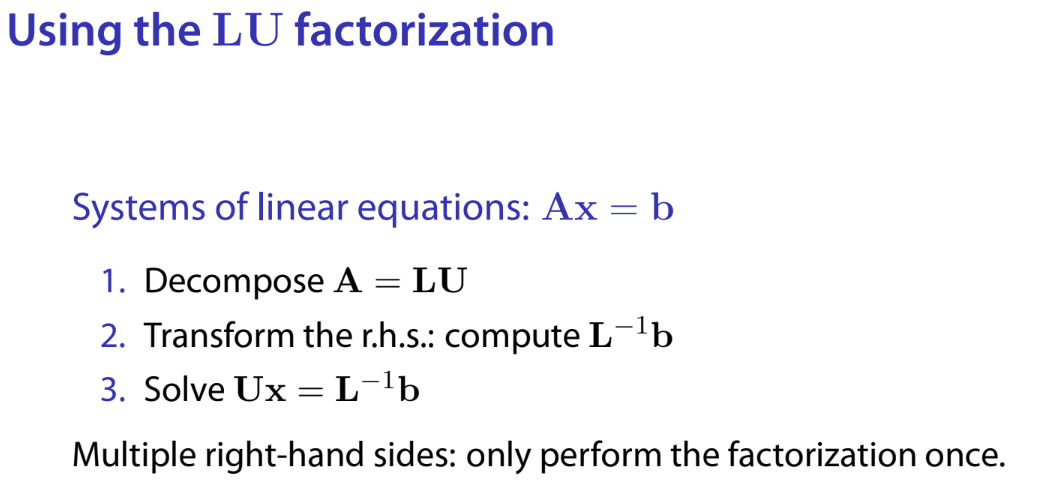

In [189]:
from scipy.linalg import lu_factor

lu, piv = lu_factor(A) # получили разложение матрицы

up = np.triu(lu) # верхняя треугольная матрица
lo = np.tril(lu, k=-1) + np.eye(n) # нижняя треугольная матрица

Преобразовываем вектор b по формуле прямого хода метода Гаусса

In [190]:
b_ch = np.linalg.inv(lo)@b
print(b_ch)

[10.          3.51525782 -1.05447949  4.34389465 -1.39905209 -0.97314108
 -0.32308088  3.46501638  2.05899815]


Теперь применим обратную подстановку

In [191]:
sol = []
sol.append(b_ch[-1]/up[-1][-1])
for i in range(n-2, -1, -1):
    sol.append((b_ch[i] - np.dot(up[i][i+1:], sol[-1::-1]))/up[i][i])

In [199]:
print("Решение через обратный ход:\n", sol[::-1])
print("Решение с помощью numpy:\n", x)

Решение через обратный ход:
 [160810757.13753918, -245838810.19761565, 233768435.86458793, -161717156.0079242, 84001880.54067595, -32399541.88247983, 8859214.771394636, -1546495.703740676, 130621.96239538693]
Решение с помощью numpy:
 [ 1.60810757e+08 -2.45838810e+08  2.33768436e+08 -1.61717156e+08
  8.40018805e+07 -3.23995419e+07  8.85921477e+06 -1.54649570e+06
  1.30621962e+05]


### 3.6.2 Дана система уравнений Ax=b порядка n, где A=A(t), t - параметр. Исследовать зависимость решения системы Ax=b от вычислительной погрешности при заданных значениях параметра t. 

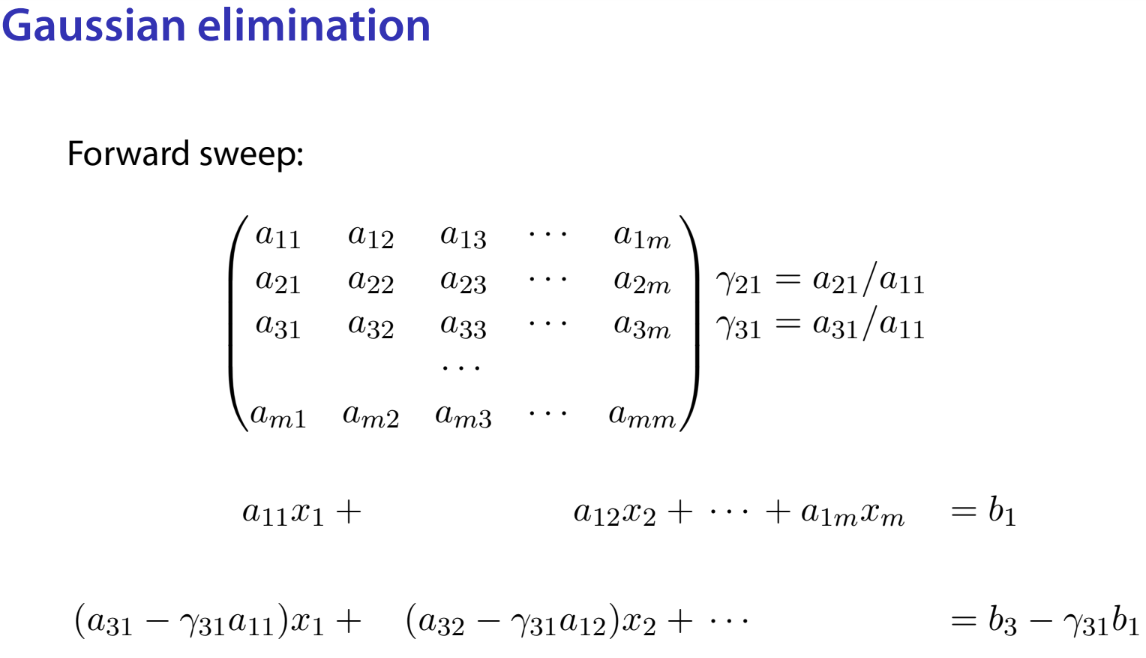
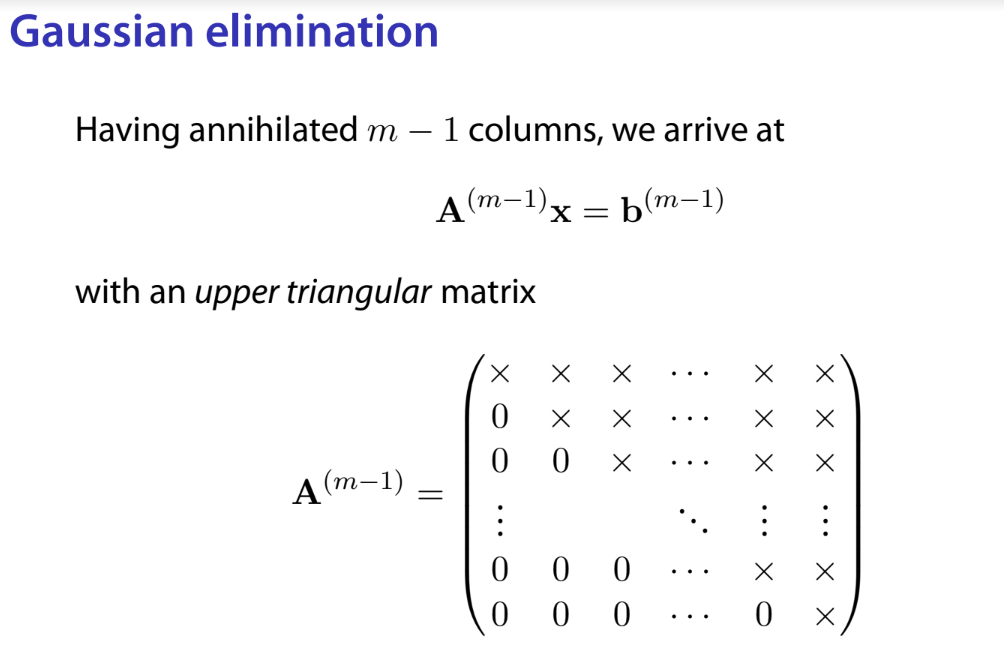
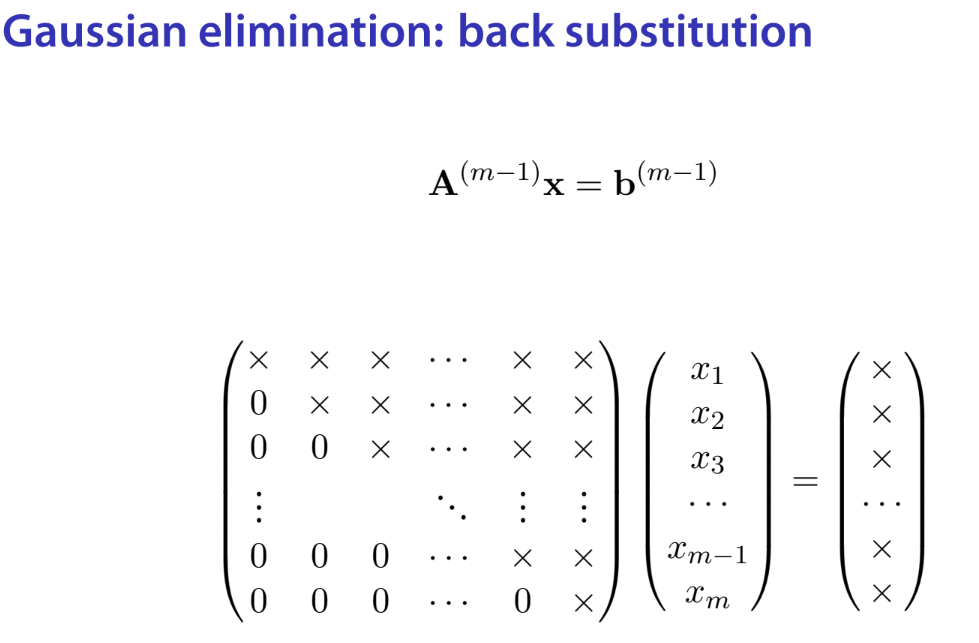

Реализуем метод Гаусса

In [1]:
import numpy as np
import copy
import math 

M=2
m=5 
n=100 #соответсвующие параметры варианта №10

t1=0.0001
t2=1
t3=10000

def gauss (A,b): 
   
    Ac = copy.copy(A) 
    bc = copy.copy(b)
    x = np.zeros(n)
    
    
    for j in range(n):
        for i in range(j+1,n):
            k = Ac[i,j]/Ac[j,j]
            Ac[i] -= Ac[j] * k 
            bc[i] -= bc[j] * k
            
           
    x[n-1] = bc[n-1]/Ac[n-1,n-1]
    
    for j in range(n-2,-1,-1):
        l=0
        for i in range(n-1-j):
            l += x[n-1-i]*Ac[j,n-1-i]
        x[j] = (bc[j]-l) / Ac[j,j]
    return x

Составим три системы, используя заданные формулы

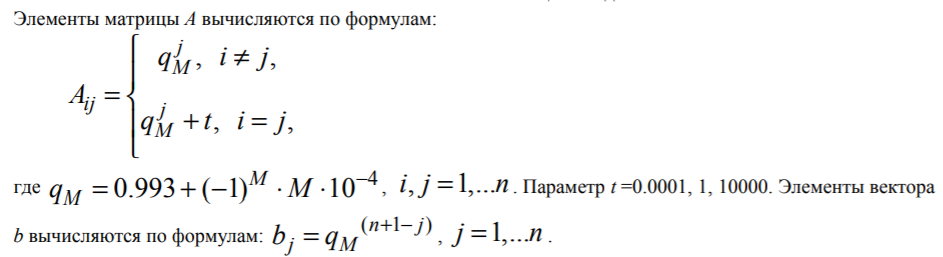

In [12]:
def createMatrix(n, t, q):
    A = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if i!=j:
                A[i,j]=q**j
            else:
                A[i,j]=q**j+t
    return A

In [16]:
q=0.993+((-1)**M)*(10**(-4))*M

A1 = createMatrix(n, t1, q)
A2 = createMatrix(n, t2, q)
A3 = createMatrix(n, t3, q)


b = np.zeros(n)
for i in range(n):
    b[i] = q**(n+1-i)

Найдём решение заданных систем 

In [17]:
x1 = gauss(A1,b)
x2 = gauss(A2,b)
x3 = gauss(A3,b)

Программа округления числа до m знаков после запятой

In [18]:
def roun(x):
        d = 10.0**m
        return math.floor(x*d)/d

Построим ту же систему, но теперь с округлением

In [19]:
def createRoundMatrix(n, t, q):
    A = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if i!=j:
                A[i,j]=roun(q**j)
            else:
                A[i,j]=roun(q**j+t)
    return A

In [29]:
A1r = createRoundMatrix(n, t1, q)
A2r = createRoundMatrix(n, t2, q)
A3r = createRoundMatrix(n, t3, q)


br = np.zeros(n)
for i in range(n):
    br[i] = roun(q**(n+1-i))

Решим полученную систему методом Гаусса

In [30]:
x1r = gauss(A1r,br)
x2r = gauss(A2r,br)
x3r = gauss(A3r,br)

Оценим погрешности и сравним их при разных значениях t

In [31]:
err1 = np.linalg.norm(x1-x1r)
err2 = np.linalg.norm(x2-x2r)
err3 = np.linalg.norm(x3-x3r)

In [34]:
print("Ошибка при t1 ",err1)
print("Ошибка при t2 ",err2)
print("Ошибка при t3 ",err3)

Ошибка при t1  0.2608571129261067
Ошибка при t2  2.608179172051651e-05
Ошибка при t3  5.6182780911867094e-09


Таким образом, при возрастании t погрешность падает.